<a href="https://colab.research.google.com/github/Haris-09/Deep-Learning/blob/main/ANN_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


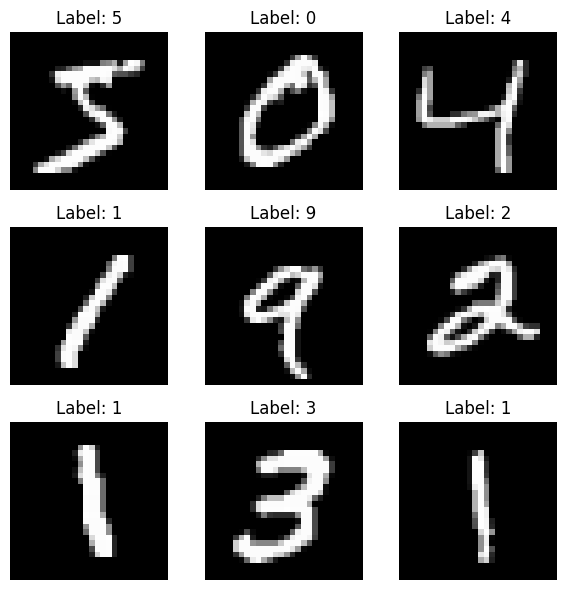

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8765 - loss: 0.4334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9638 - loss: 0.1219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0776
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9827 - loss: 0.0571
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9872 - loss: 0.0436
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.0960

Test accuracy: 0.9749000072479248


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Show first 9 images with labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


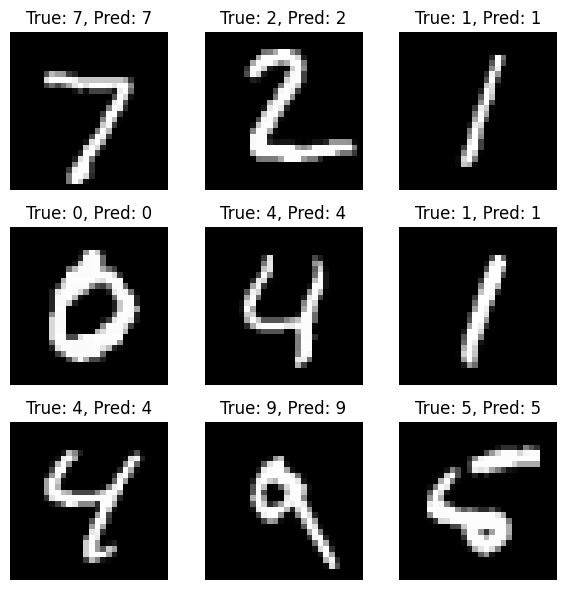

In [2]:
# Show first 9 images with labels
plt.figure(figsize=(6,6))
for i in range(9): # Show only first 9 images
    plt.subplot(3,3,i+1)
    # Add a batch dimension to the image before predicting
    prediction = model.predict(x_test[i:i+1])
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


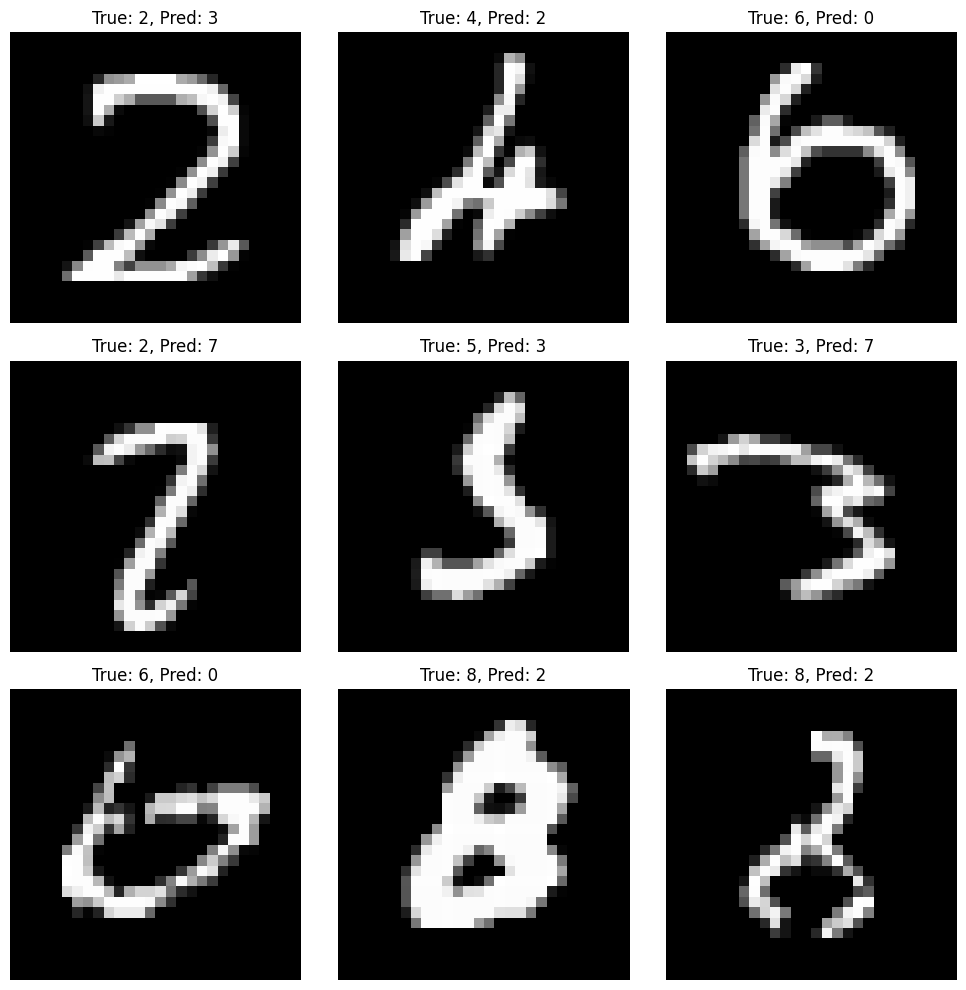

In [3]:
# Find incorrect predictions
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

incorrect_indices = []
for i in range(len(y_test)):
    if y_test[i] != predicted_labels[i]:
        incorrect_indices.append(i)

# Show some incorrect predictions
plt.figure(figsize=(10,10))
for i in range(min(9, len(incorrect_indices))):
    index = incorrect_indices[i]
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {predicted_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()